<a href="https://colab.research.google.com/github/jiteshpabla/PyTorch_tutorials/blob/master/UdacityPyTorch_2_NNinPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and data loading

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# torchvison has datasets and model for computer vision
from torchvision import datasets, transforms

# transform for normalizing the dataset
transform = transforms.Compose(([transforms.ToTensor(),
                               #https://discuss.pytorch.org/t/understanding-transform-normalize/21730
                               #normalize from -1 to 1
                               transforms.Normalize((0.5,), (0.5,))
                               ]))

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
#trainloader is a generator but somehow can't use the .next() function unless parsed into iterator type
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [6]:
images[0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [7]:
# squeeze() removes the extra dimention from the tensor
img_array = images[0].numpy().squeeze()
img_array

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

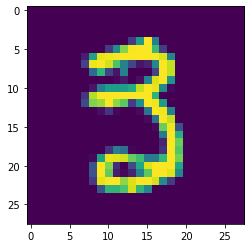

In [8]:
plt.imshow(img_array)

In [10]:
#images.view(images.shape[0], 784)
images.view(images.shape[0], -1) #same thing

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [47]:
images.shape

torch.Size([64, 784])

## making Multi layer NN

In [29]:
#784, 256, 10

class mlp_1_hidden:
    def __init__(self, n_input=3, n_hidden=2, n_output=1):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output

    def activation(self, x):
        #sigmoid
        return 1/(1+torch.exp(-x))

    def softmax(self, input):
        num = torch.exp(input) #64, 10
        # (64,) to (64,1)
        den = torch.sum(torch.exp(input), dim = 1).view(input.shape[0], 1) #we can also do view(-1, 1) here
        # divide 10 values by 1 for each of the 64 values
        return num/den

    def calc_output(self, features):
        assert features.shape[1] == self.n_input

        w1 = torch.randn((self.n_input, self.n_hidden))
        w2 = torch.randn((self.n_hidden, self.n_output))
        b1 = torch.randn((self.n_hidden))
        b2 = torch.randn((self.n_output))

        h1 = self.activation((torch.mm(features, w1) + b1))
        h2 = self.softmax(torch.mm(h1, w2) + b2)

        return h2
            

n_input = 784
#flatten the input batch to 64, -1. -1 flattens rest of the dimentions
#features = images.view(images.shape[0], -1)
features = images.view(images.shape[0], n_input)
mlp_model = mlp_1_hidden(n_input, 256, 10)
out = mlp_model.calc_output(features)
print(out.shape)

torch.Size([64, 10])


In [31]:
print(torch.sum(out, dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## using Torch NN module

In [32]:
from torch import nn
import torch.nn.functional as F

In [39]:
class network_simple(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

        #don't need these when using nn.functional
        #self.sigmoid = nn.Sigmoid()
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = F.sigmoid(x) #or self.sigmoid
        x = self.output(x)
        x = F.softmax(x)

        return x

In [40]:
model = network_simple()
model

network_simple(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [41]:
class network_s(nn.Module):
    def __init__(self):
        super().__init__()

        self.h1 = nn.Linear(784, 128)
        self.h2 = nn.Linear(126, 64)
        self.o1 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.ReLu(self.h1(x))
        x = F.ReLu(self.h2(x))
        #Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns
        x = F.Softmax(self.o1(x), dim = 1)


In [43]:
model = network_s()
model

network_s(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (h2): Linear(in_features=126, out_features=64, bias=True)
  (o1): Linear(in_features=64, out_features=10, bias=True)
)